In [10]:
"""
TASK: You own a small coffee shop and you want to predict daily revenue using two simple factors.

Build a multiple linear regression model from scratch to learn:

- average revenue per coffee

- average revenue per pastry

- base daily revenue (b)

"""

import numpy as np
import copy
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

X = np.array([
    [10, 2],   # Day 1: 10 coffees, 2 pastries
    [8,  1],   # Day 2
    [15, 3],   # Day 3
    [12, 2],   # Day 4
    [20, 4]    # Day 5
])
y = np.array([32, 25, 48, 38, 62])  # Daily revenue ($)


Predicted Value:31.795927742928605 vs. Target Value: 32
Predicted Value:25.28796958435622 vs. Target Value: 25
Predicted Value:47.247042076824535 vs. Target Value: 48
Predicted Value:37.75803185981096 vs. Target Value: 38
Predicted Value:62.69815641072046 vs. Target Value: 62
Estimated Revenue: 34.776979801369784


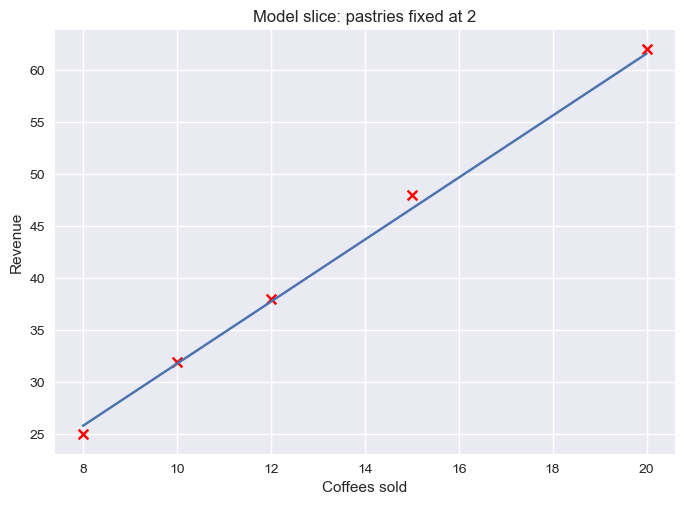

In [20]:
# Given one day’s sales, predict revenue.
def predict_one(x, w, b):
    """
    n = x.shape[0] #number of rows
    p = 0

    for i in range(n):
        p += w[i] * x[i]
    
    p += b
    """
    # Effective shortcut using numpy (Vectorization)
    p = np.dot(x, w) + b
    return p

# Measure how wrong your predictions are across all days. - Cost Function J(w, b)
def compute_cost(X, y, w, b):

    m = X.shape[0]
    cost = 0.0

    # Calculating cost function: J = (1/2m) * ∑(y_hat - y)**2
    for i in range(m):
        y_hat = predict_one(X[i], w, b)
        cost += (y_hat - y[i])**2
    cost = cost / (2*m)

    return cost

# Finding dJ/dw -> how to change coffee & pastry weights
# dJ/db -> how to change base revenue
def compute_gradient(X, y, w, b):

    m,n = X.shape
    dJ_dw = np.zeros((n,))
    dJ_db = 0.0

    for i in range(m):
        error = predict_one(X[i], w, b) - y[i]
        for j in range(n):
            dJ_dw[j] += error * X[i, j]
        dJ_db += error 

    dJ_dw = dJ_dw / m
    dJ_db = dJ_db / m

    return dJ_dw, dJ_db


# Updating the values of w and b using learning rate alpha and number of iterations num_iter
def gradient_descent(X, y, w_initial, b_initial, alpha, num_iter, gradient_func):
    
    w = copy.deepcopy(w_initial)
    b = b_initial

    for i in range(num_iter):

        # Computing partial derivatives of J(cost function)
        dJ_dw, dJ_db = gradient_func(X, y, w, b)


        # Updating the values of w and b
        w -= alpha * dJ_dw
        b -= alpha * dJ_db

    return w, b
    

n = X.shape[0]
w = np.zeros(2)
b = 0.0

# Gradient Descent Algorithm
# Required Output: For each day -> Predicted Value and Actual Value
predicted_w, predicted_b = gradient_descent(
    X, y, w, b, 
    0.01, 1000, 
    compute_gradient
)

for i in range(n):
    print(f"Predicted Value:{np.dot(X[i], predicted_w) + predicted_b} vs. Target Value: {y[i]}")


# New Day Estimation
new_day = np.array([11, 2])   # 11 coffees, 2 pastries

print(f"Estimated Revenue: {np.dot(new_day, predicted_w) + predicted_b}")

# Task 2: plot the data points and the linear function

fixed_pastries = 2
# For smooth line - (Not effective in this example!)
coff = np.linspace(X[:,0].min(), X[:,0].max(), 100)

pred_line = predicted_w[0]*coff + predicted_w[1]*fixed_pastries + predicted_b

plt.scatter(X[:,0], y, marker='x', c = "r")
plt.plot(coff, pred_line)

plt.xlabel("Coffees sold")
plt.ylabel("Revenue")
plt.title("Model slice: pastries fixed at 2")
plt.show()


